# Customer Segmentation Analysis With Python

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

import warnings
warnings.filterwarnings("ignore")

#### Machine Learning Classification Using K-Means Algoritm

#### Analyzing segmentation analysis datasets below:

In [3]:
df = pd.read_csv('data/Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### View descriptive statistics of the dataset with the command:

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Check the correlation of the data using the Pearson method with the following command:

In [9]:
df = pd.DataFrame(df)

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Ver los tipos de datos de las columnas numéricas
print(df_numeric.dtypes)

CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [10]:
df_numeric.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### Show correlation of data easily using heatmap with the following command:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

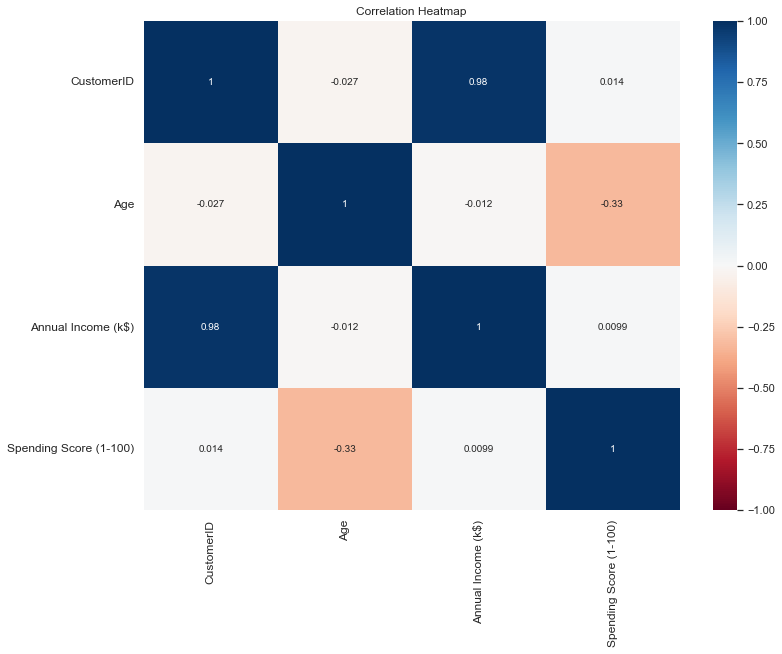

In [13]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_numeric.corr(),
                annot=True,
                cmap="RdBu",
                vmin=-1,
                vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

The picture shows that the bluer the color of the correlation, the stronger the positive correlation. And the redder the higher the negative correlation.
The image above has the same results as the table in the previous step, but the view of the data with a heat map is easier to understand.

### Visualize the data using a scatter plot

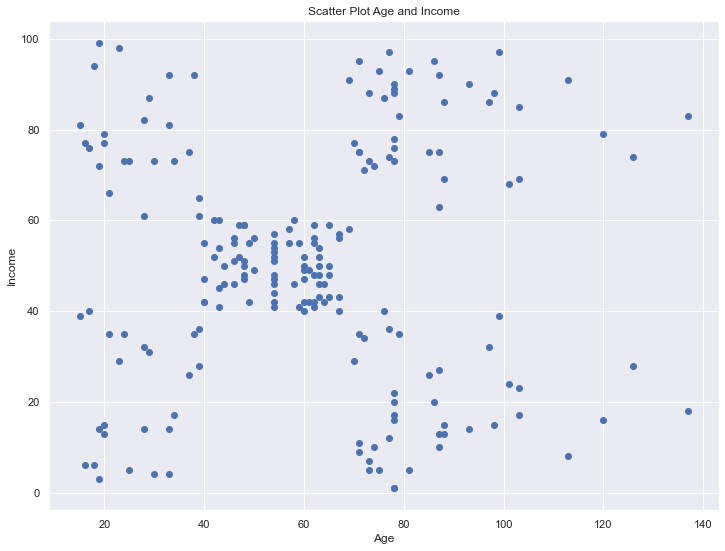

In [23]:
plt.figure(figsize=(12, 9))
plt.scatter(df_numeric.iloc[:, 2], df_numeric.iloc[:, 3])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Scatter Plot Age and Income")
plt.show()

### Data Cleaning / Data Standardization

In [24]:
scaler =StandardScaler()
data_std = scaler.fit_transform(df_numeric)

The command is not only to standardize the data, but also save the standardized data into a variable named data_std

### Clustering Data with Hierarchical Clustering method

In [25]:
hierarchy_cluster = linkage(data_std, method='ward')

### Visualization on Hierarchical Clustering

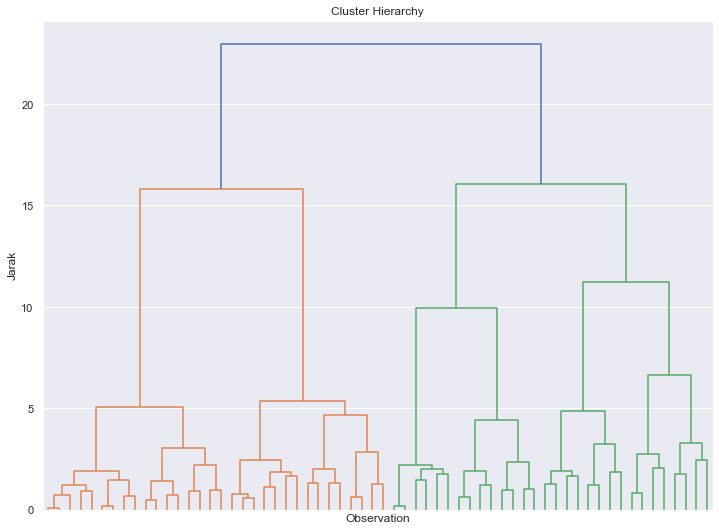

In [29]:
plt.figure(figsize=(12,9))
plt.title("Cluster Hierarchy")
plt.xlabel("Observation")
plt.ylabel("Jarak")
dendrogram(hierarchy_cluster, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True )
plt.show()

The picture shows that there are 2 clusters

### Performing Flat Clustering using K-means Clustering

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

The code aboves is to perform clustering experiments 10 times with 42 times random conditions on the data with the k-means++ algorithm and store the results stored in the wcss array variable

### Showing wcss result

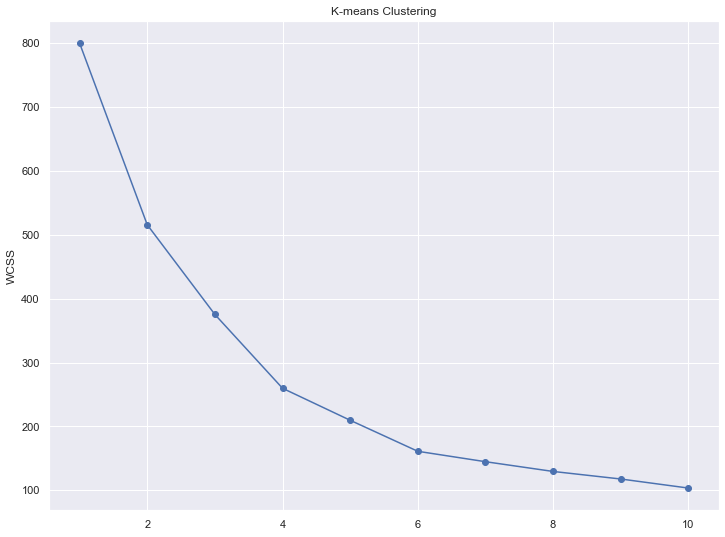

In [38]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

### Performing Clustering with the number of Clusters 4

In [42]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(data_std)

KMeans(n_clusters=2, random_state=42)

In [44]:
data_kmeans = df_numeric.copy()
data_kmeans['segment'] = kmeans.labels_

In the dataset data_kmens variable, a new column named “segment” is created to store the results of the classification of the data.

### Analyze the Cluster results to see the average value

In [45]:
data_kmeans_analisis = data_kmeans.groupby('segment').mean() 
data_kmeans_analisis

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
segment,,,,
0,53.676190,42.219048,40.780952,49.961905
1,152.252632,35.126316,82.421053,50.463158


### Performing the calculation of the number of members from each cluster

In [47]:
data_kmeans_analisis['segment_customer'] = data_kmeans.groupby('segment')['Age'].count()

In [48]:
data_kmeans_analisis

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),segment_customer
segment,,,,,
0,53.676190,42.219048,40.780952,49.961905,105
1,152.252632,35.126316,82.421053,50.463158,95


### Knowing how much the average proportion of the segment to the amount of data

In [50]:
data_kmeans_analisis['test2'] = data_kmeans_analisis['segment_customer']/data_kmeans_analisis ['segment_customer'].sum()
data_kmeans_analisis

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),segment_customer,rata2,test2
segment,,,,,,,
0,53.676190,42.219048,40.780952,49.961905,105,0.525,0.525
1,152.252632,35.126316,82.421053,50.463158,95,0.475,0.475


In [51]:
data_kmeans_analisis.drop('rata2', axis=1, inplace=True)

In [52]:
data_kmeans_analisis

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),segment_customer,test2
segment,,,,,,
0,53.676190,42.219048,40.780952,49.961905,105,0.525
1,152.252632,35.126316,82.421053,50.463158,95,0.475
